In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

/var/folders/tx/t_y2r90n5gd84735fqzpxzcr0000gn/T/ipykernel_43354/1432714081.py:7: RuntimeWarning: divide by zero encountered in divide
  capacity = buffer_size / send_receive_time


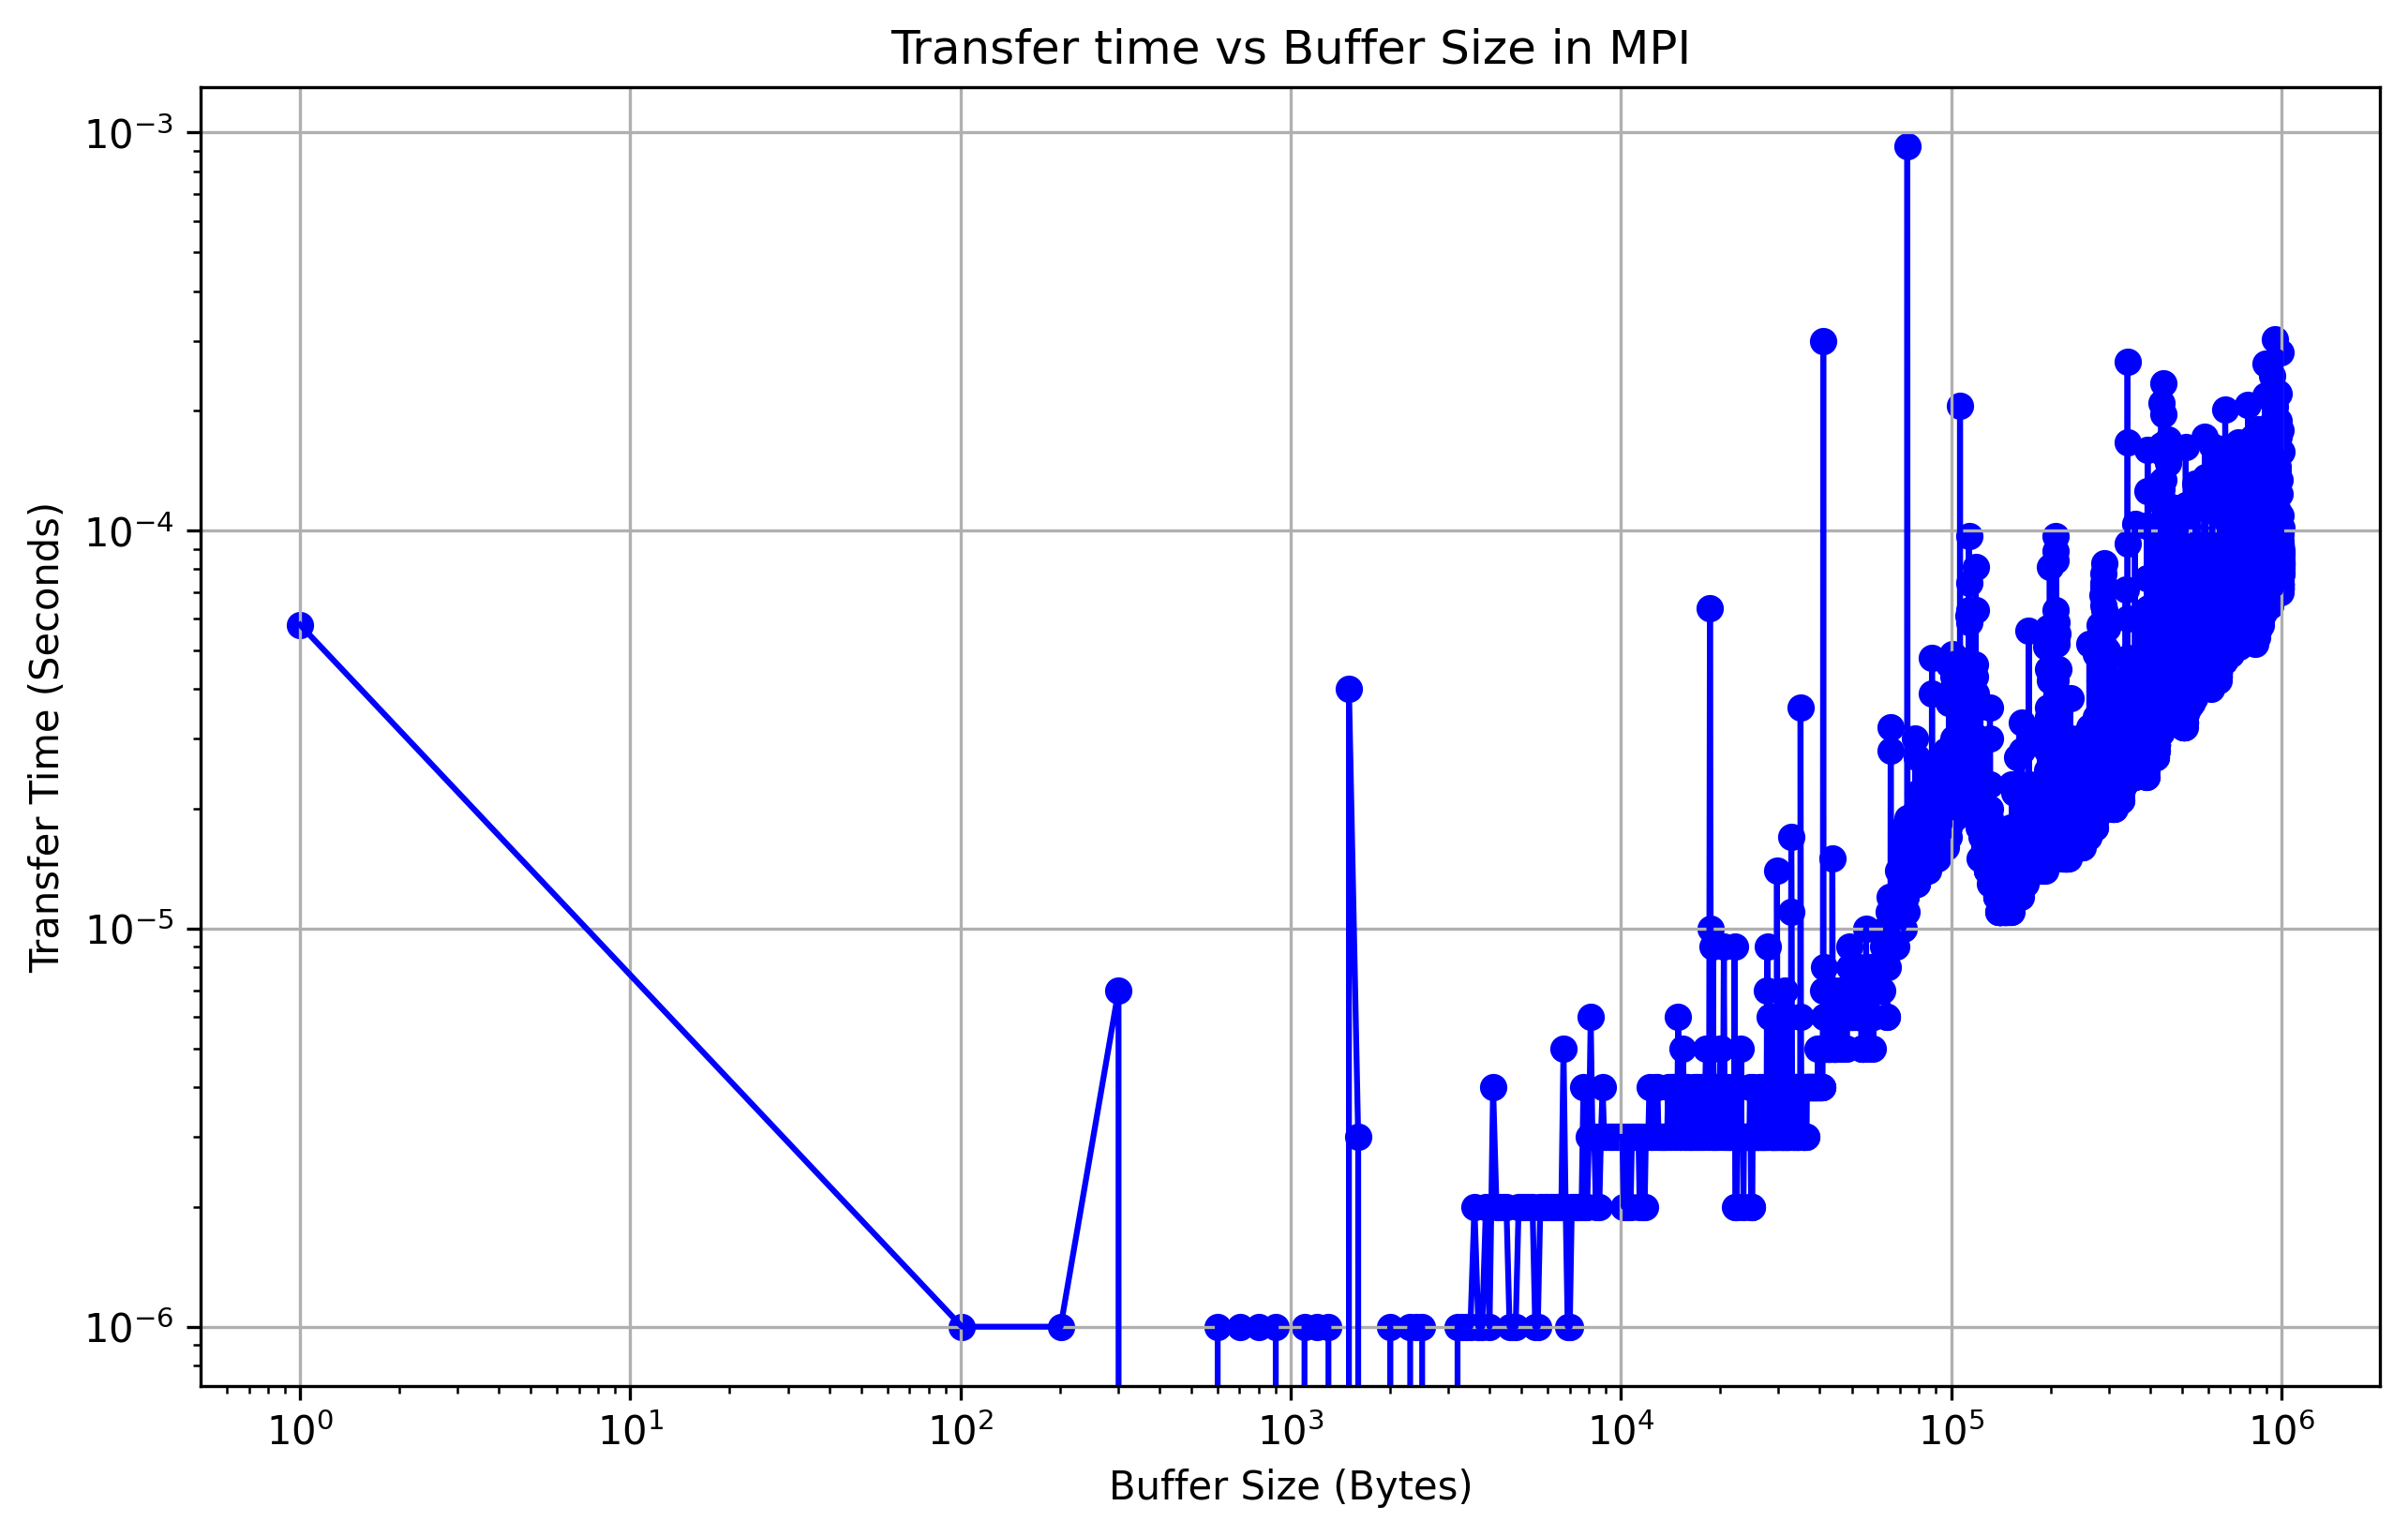

In [11]:
# Read the CSV file
data = pd.read_csv('mpi_send_recv_results.csv')

# Extract Buffer Size and Send-Receive Time from the CSV
buffer_size = np.array(data['Buffer'])
send_receive_time = np.array(data['Time'])
capacity = buffer_size / send_receive_time

# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, send_receive_time, linestyle='-', color='b')
plt.scatter(buffer_size, send_receive_time, color='b')

# Add labels and title
plt.xlabel('Buffer Size (Bytes)')
plt.ylabel('Transfer Time (Seconds)')
plt.title('Transfer time vs Buffer Size in MPI')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('send_rcv_time.png')

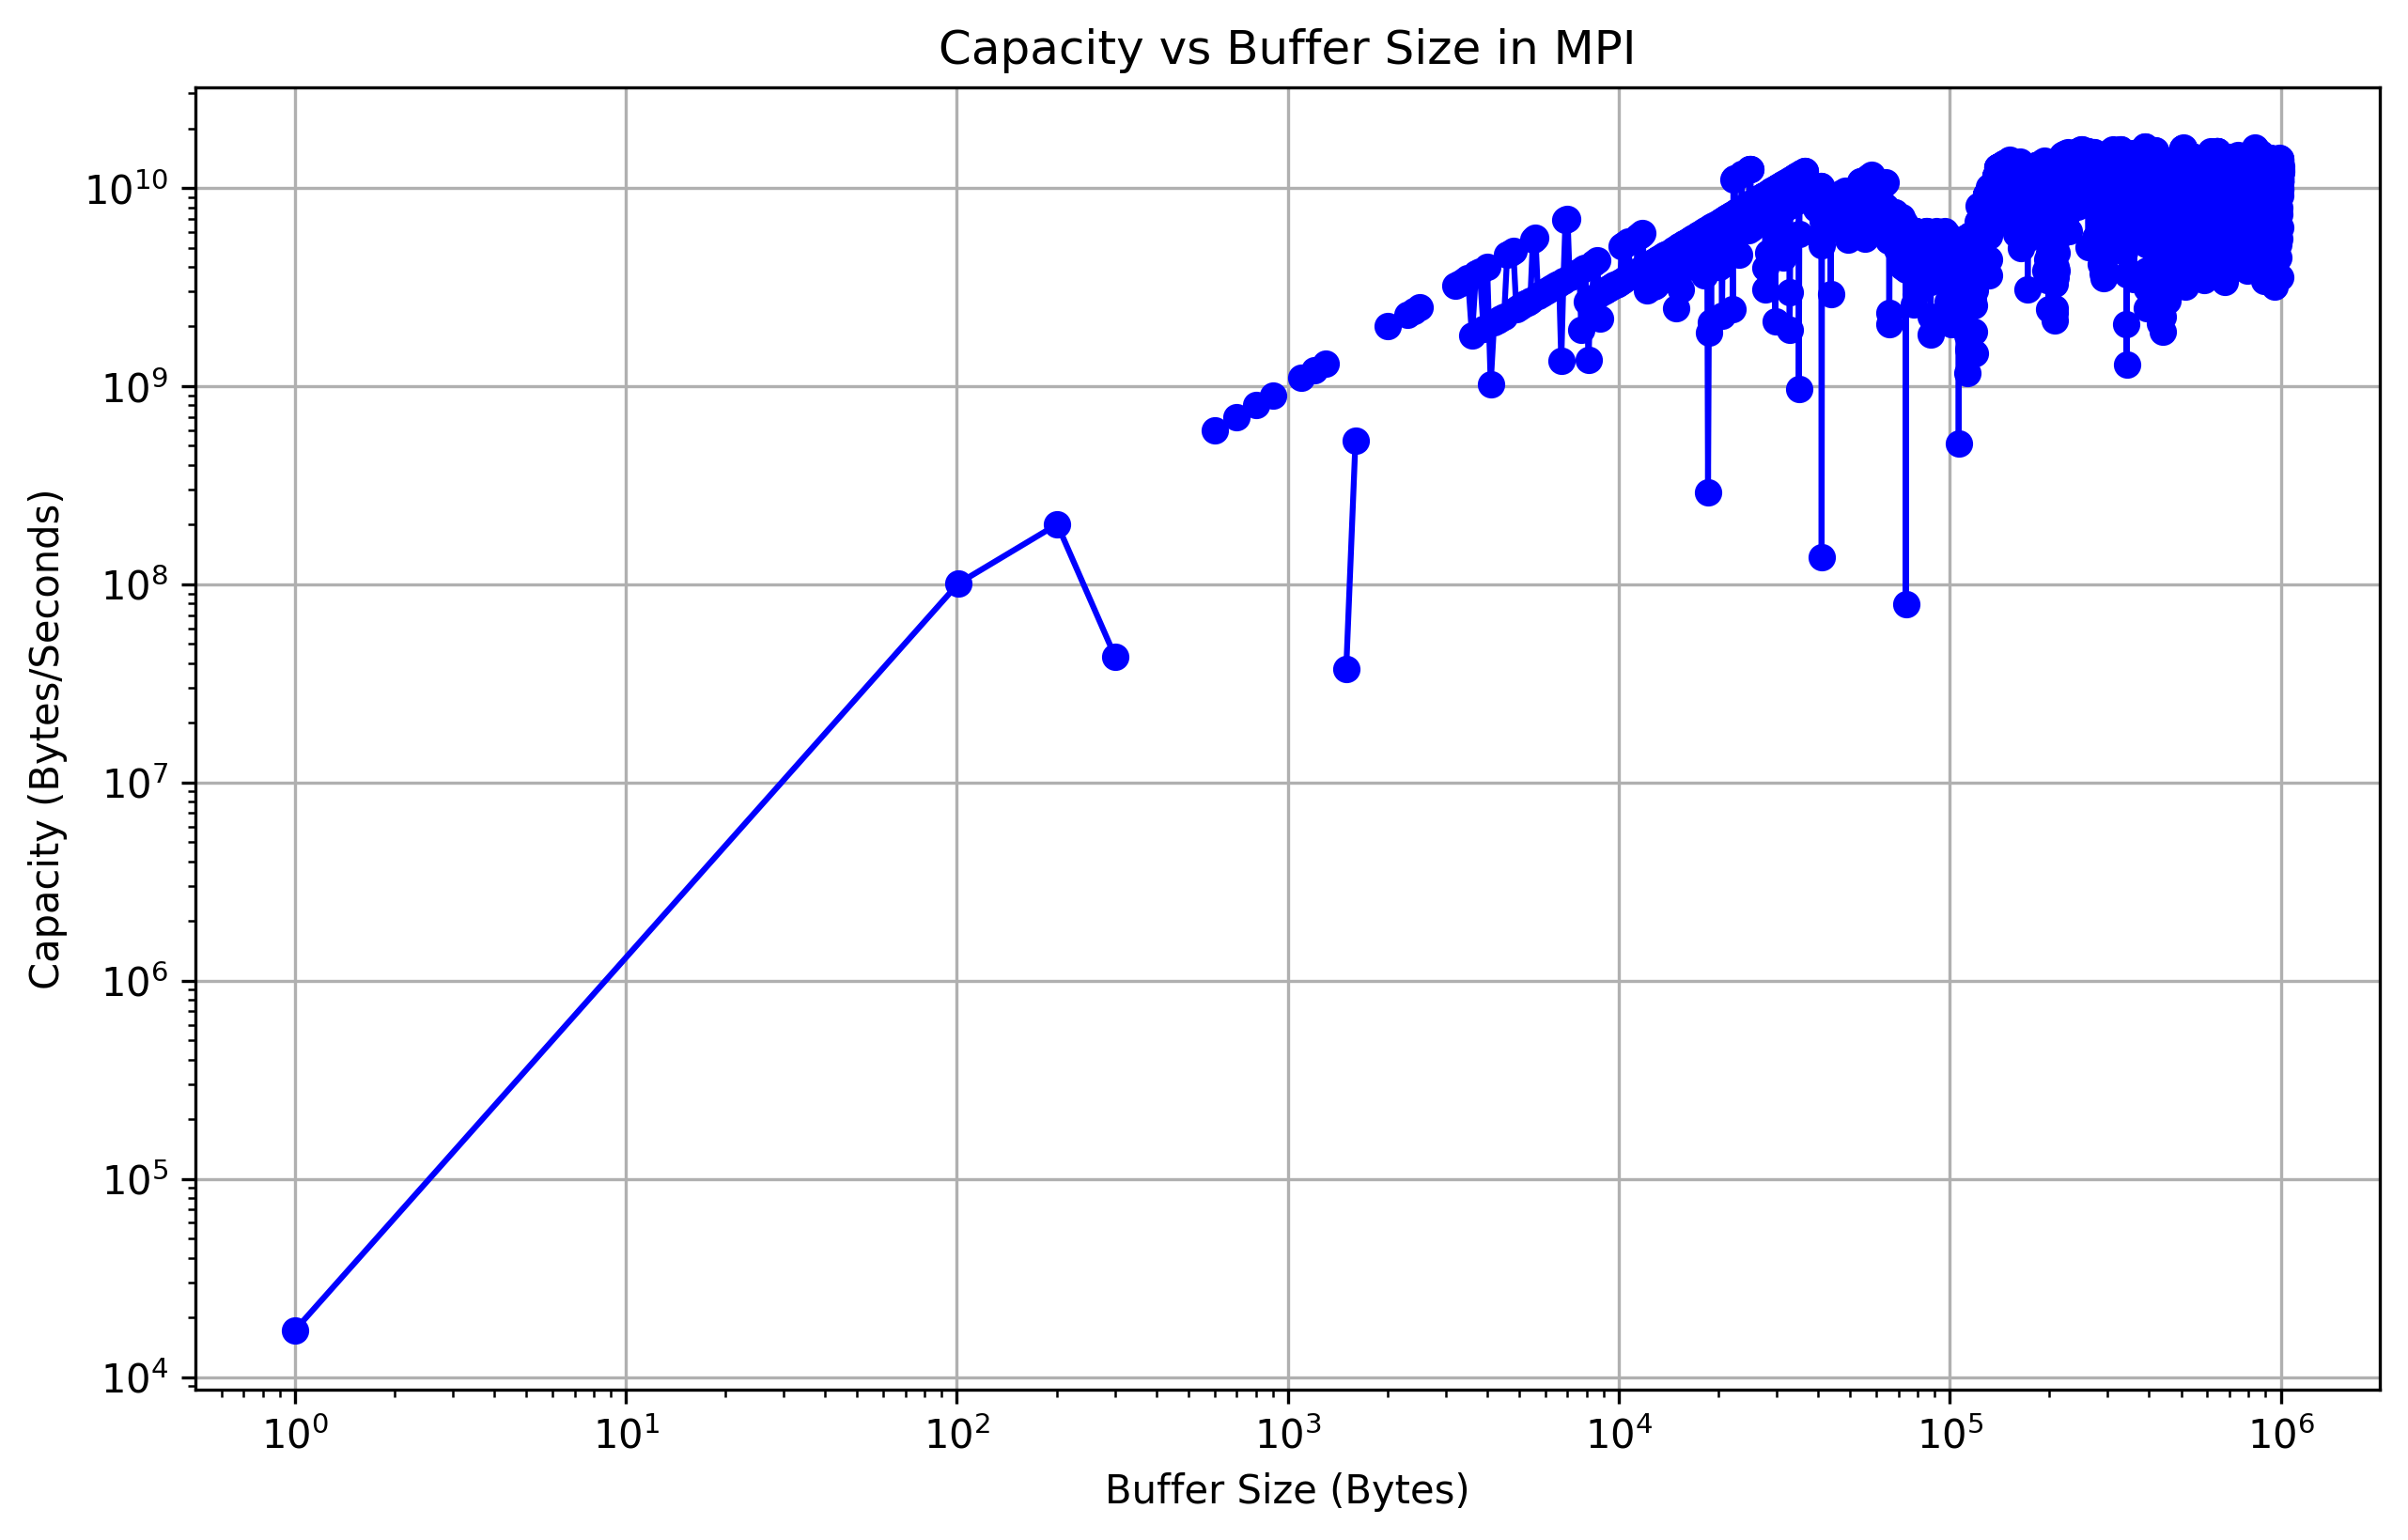

In [12]:
# Create a plot
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(buffer_size, capacity, linestyle='-', color='b')
plt.scatter(buffer_size, capacity,color='b')

# Add labels and title
plt.xlabel('Buffer Size (Bytes)')
plt.ylabel('Capacity (Bytes/Seconds)')
plt.title('Capacity vs Buffer Size in MPI')

# Add grid
plt.grid(True)

# Set log scale for the x-axis (optional, since buffer sizes can grow exponentially)
plt.xscale('log')
plt.yscale('log')

# Show the plot
plt.savefig('send_rcv_capacity.png')